In [2]:
import pandas as pd
import sqlalchemy as db
import argparse
import pprint
import sys
import os
import subprocess
import json
from getpass import getpass

# Database

In [299]:
#Show all columns and rows 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Billboard Artists dataset

In [8]:
bb_artists = pd.read_csv('data/analysis/bb_artists_complete.csv').drop(columns='Unnamed: 0')

In [12]:
bb_artists.head()

artist                                    uri  followers  \
0             Doja Cat  spotify:artist:5cj0lLjcoR7YOSnhnX0Po5    1892264   
1  Megan Thee Stallion  spotify:artist:181bsRPaVXVlUKXrxwZfHK    1107542   
2           The Weeknd  spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ   20303554   
3                Drake  spotify:artist:3TVXtAsR1Inumwj472S9r4   46377628   
4          Roddy Ricch  spotify:artist:757aE44tKEUQEqRuT6GnEB    2526217   

                                              genres  popularity  \
0                                ['la indie', 'pop']          91   
1    ['houston rap', 'pop', 'pop rap', 'trap queen']          87   
2  ['canadian contemporary r&b', 'canadian pop', ...          97   
3  ['canadian hip hop', 'canadian pop', 'hip hop'...         100   
4                                    ['melodic rap']          93   

               spotify_id    chart  
0  5cj0lLjcoR7YOSnhnX0Po5  hot-100  
1  181bsRPaVXVlUKXrxwZfHK  hot-100  
2  1Xyo4u8uXC1ZmMpatF05PJ  hot-100  
3  3TVXtAsR1Inumwj472S9r4  hot-100  
4  757aE44tKEUQEqRuT6GnEB  hot-100

In [14]:
bb_artist_analysis=bb_artists[['artist','followers','popularity','chart', 'genres']]

In [15]:
bb_artist_analysis

artist  followers  popularity                     chart  \
0                Doja Cat    1892264          91                   hot-100   
1     Megan Thee Stallion    1107542          87                   hot-100   
2              The Weeknd   20303554          97                   hot-100   
3                   Drake   46377628         100                   hot-100   
4             Roddy Ricch    2526217          93                   hot-100   
...                   ...        ...         ...                       ...   
3016          Keri Hilson    1235829          68  world-digital-song-sales   
3017           Bonde R300     533603          59  world-digital-song-sales   
3018                 XANG        316          44  world-digital-song-sales   
3019             Mayklove        142          53  world-digital-song-sales   
3020               Lebo M      18038          63  world-digital-song-sales   

                                                 genres  
0                                   ['la indie', 'pop']  
1       ['houston rap', 'pop', 'pop rap', 'trap queen']  
2     ['canadian contemporary r&b', 'canadian pop', ...  
3     ['canadian hip hop', 'canadian pop', 'hip hop'...  
4                                       ['melodic rap']  
...                                                 ...  
3016  ['dance pop', 'deep pop r&b', 'hip pop', 'pop'...  
3017                                   ['funk carioca']  
3018                                                 []  
3019                                                 []  
3020                          ['disney', 'movie tunes']  

[3021 rows x 5 columns]

In [33]:
type(eval('123'))

int

In [31]:
list(set(bb_artist_analysis.genres.apply(lambda x: eval(x)).sum()))

['deep groove house',
 'electropowerpop',
 'chamber psych',
 'electropop',
 'symphonic black metal',
 'polish thrash metal',
 'new orleans rap',
 'indie rock',
 'moombahton',
 'drill',
 'finnish metal',
 'canadian country',
 'samba-enredo',
 'sertanejo',
 'icelandic pop',
 'uk reggae',
 'krautrock',
 'electra',
 'progressive rock',
 'futurepop',
 'latin',
 'big beat',
 'indie r&b',
 'ninja',
 'melodic dubstep',
 'queens hip hop',
 'canadian folk',
 'la pop',
 'p funk',
 'modern old-time',
 'canadian electronic',
 'emo',
 'bass trap',
 'british soul',
 'pop argentino',
 'pop quebecois',
 'irish rock',
 'mpb',
 'deep smooth jazz',
 'melbourne bounce international',
 'deep vocal house',
 'canadian rock',
 'gothic rock',
 'metropopolis',
 'german dance',
 'classic rock',
 'ska punk',
 'trap chileno',
 'redneck',
 'jazz trumpet',
 'alternative metal',
 'bmore',
 'australian country',
 'adult standards',
 'german hard rock',
 'japanese emo',
 'harpsichord',
 'torch song',
 'salsa',
 'talent 

In [140]:
bb_artist_analysis.query('followers < 100')

artist  followers  popularity  \
130                         Various Artists         41           8   
320                             M.C. Hammer         77           0   
591                                   Falco         16          57   
686                              Young M.C.         61          20   
837                        Rhythm Syndicate         40           0   
935                                     4PM          1           0   
1147      Banda El Recodo de Cruz Lizarraga          0           0   
1166                                Pandora         30          36   
1433                             Tom Fuller         20          11   
1811                                   Alya         25          30   
1813                                Raquela         33           1   
1816                       Brett Oosterhaus         12           3   
1818                              Ladi Rosa          7          21   
1822                                Gaurika          1           9   
1823                             Betty Reed         23           1   
1829                               Mike Jay          6          18   
1831                                DJ Head          0          24   
1940                                   G.I.         50          37   
2012                            Daryl Beebe         76          10   
2026                         Alex Parchment         63          12   
2228                              yorushika         22           1   
2229                            The Snowman         14           0   
2231                                  Rinne         51          18   
2244                               Snow Man         38           0   
2251                      Koutaro Nishiyama          1           1   
2265                           Mr. Children          1           2   
2299                           Me After You         41           0   
2417                  Studio Cast Recording         20           1   
2419          World Premiere Cast Recording         25           2   
2427                        Roger St. Denis         74           0   
2445                           Mahmood Khan         64           3   
2561                                   K.C.         13          31   
2569                          The Wild Pair         30          25   
2626                                 Hector         23          50   
2660                     Asheville Symphony         85          27   
2756                            Pichy Perez          1           0   
2832                         Tamara Wallace         29          10   
2834                         Danilo Botelho         12           2   
2857                        Jesus Promoters         17          17   
2861                                    LFC          7           0   
2863                              DJ Rogers         36           1   
2869   The Restoration Worship Center Choir         29          19   
2871                The Atmosphere Changers         36           5   
2873                         Isaiah Freeman         60           7   
2874                 Dorothy Combs Morrison         60           7   
2880                The Minnesota Orchestra          1           3   
2889  Archi dell'Accademia di Santa Cecilia         18          41   
2892                     Richard K. Pugsley          3          22   
2904                         Darrell Crooks          8          23   
2905                        Ghetto Classics          1           3   
2939                          Breagh Isabel         92          44   
2999                           Lida Roumani          2          14   
3000                        Nicolaa Piovani          2          14   
3006                        Various Artists         41           8   

                                  chart               genres  
130                       billboard-200                   []  
320       greatest-billboard-200-albums                   []

In [135]:
bb_artist_analysis.describe()

followers   popularity
count  3.021000e+03  3021.000000
mean   1.895864e+06    63.215823
std    4.675352e+06    17.265432
min    0.000000e+00     0.000000
25%    5.021200e+04    54.000000
50%    3.595800e+05    66.000000
75%    1.540488e+06    75.000000
max    6.338240e+07   100.000000

In [136]:
import seaborn as sns

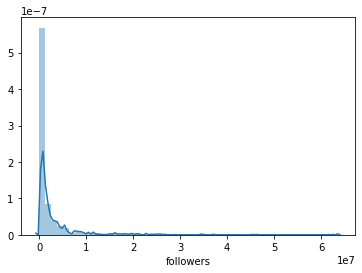

In [137]:
sns.distplot(bb_artist_analysis.followers)

In [36]:
bb_songs = pd.read_csv('data/analysis/bb_songs_complete.csv').drop(columns='Unnamed: 0')

In [37]:
bb_songs.head()

track               artist  \
0           Say So             Doja Cat   
1           Savage  Megan Thee Stallion   
2  Blinding Lights           The Weeknd   
3     Toosie Slide                Drake   
4          The Box          Roddy Ricch   

                                          art_genres    chart  \
0                                ['la indie', 'pop']  hot-100   
1    ['houston rap', 'pop', 'pop rap', 'trap queen']  hot-100   
2  ['canadian contemporary r&b', 'canadian pop', ...  hot-100   
3  ['canadian hip hop', 'canadian pop', 'hip hop'...  hot-100   
4                                    ['melodic rap']  hot-100   

                             tracks_uri                           albums_uris  \
0  spotify:track:3Dv1eDb0MEgF93GpLXlucZ  spotify:album:1MmVkhiwTH0BkNOU3nw5d3   
1  spotify:track:55CHeLEfn5iJ0IIkgaa4si  spotify:album:6Lo6ylJg4qbFfxicPEOzMI   
2  spotify:track:0VjIjW4GlUZAMYd2vXMi3b  spotify:album:4yP0hdKOZPNshxUOjY0cZj   
3  spotify:track:127QTOFJsJQp5LbJbu3A1y  spotify:album:3xIwVbGJuAcovYIhzbLO3J   
4  spotify:track:0nbXyq5TXYPCO7pr3N8S4I  spotify:album:52u4anZbHd6UInnmHRFzba   

   popularity  acousticness  danceability  energy  instrumentalness   key  \
0          96       0.25600         0.787   0.673          0.000004  11.0   
1          92       0.02520         0.843   0.741          0.000000  11.0   
2         100       0.00146         0.514   0.730          0.000095   1.0   
3          97       0.32100         0.834   0.454          0.000006   1.0   
4          97       0.10400         0.896   0.586          0.000000  10.0   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.0904    -4.577   0.0       0.1580  110.962             4.0    0.786  
1    0.0960    -5.609   1.0       0.3340  168.983             4.0    0.680  
2    0.0897    -5.934   1.0       0.0598  171.005             4.0    0.334  
3    0.1140    -9.750   0.0       0.2010   81.618             4.0    0.837  
4    0.7900    -6.687   0.0       0.0559  116.971             4.0    0.642

In [44]:
import seaborn as sns

In [46]:
bb_songs.isna().sum()

track               0
artist              0
art_genres          0
chart               0
tracks_uri          0
albums_uris         0
popularity          0
acousticness        2
danceability        2
energy              2
instrumentalness    2
key                 2
liveness            2
loudness            2
mode                2
speechiness         2
tempo               2
time_signature      2
valence             2
dtype: int64

In [48]:
import numpy as np

In [52]:
bb_songs.query('energy == "NaN"')

track          artist  \
223  Murdaa Cee Wrote!  NWM Cee Murdaa   
528  Ode To Billie Joe   Bobbie Gentry   

                                     art_genres  \
223                                          []   
528  ['brill building pop', 'traditional folk']   

                               chart                            tracks_uri  \
223                   current-albums  spotify:track:4Ew8R199FlZ1UMnlB8HoyN   
528  greatest-hot-100-songs-by-women  spotify:track:3LzVF7EbnXi3L5UDnaBClL   

                              albums_uris  popularity  acousticness  \
223  spotify:album:3pNtdJvsjT3KjhQ0rIp6On          34           NaN   
528  spotify:album:23Lqr6YXcILvNvbzIwqpOf           0           NaN   

     danceability  energy  instrumentalness  key  liveness  loudness  mode  \
223           NaN     NaN               NaN  NaN       NaN       NaN   NaN   
528           NaN     NaN               NaN  NaN       NaN       NaN   NaN   

     speechiness  tempo  time_signature  valence  
223          NaN    NaN             NaN      NaN  
528          NaN    NaN             NaN      NaN

In [53]:
bb_songs.dropna(inplace=True)

# Unsupervised - Songs Recommendation

## Audio Features Simmilarity

Clustering -> Unsupervised learning

**Choosing features**

**> Features that won't be used to classify the tracks**
- `duration_ms`: (int) duration of the track in milliseconds.
- `key`:	(int) estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- `mode`:	(int)	modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- `liveness:`	(float)	Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 


**> Features that will be used to classify the tracks**

- `acousticness:`	(float)	A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 
- `danceability:`	(float)	Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- `energy:`	(float)	Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- `instrumentalness:`	(float)	Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
- `loudness:` (float)	loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 
- `speechiness:` (float)	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 
- `valence:`	(float)	A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- `tempo:`	(float)	The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- `time_signature`:	(int)	An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [150]:
bb_songs.columns

Index(['track', 'artist', 'art_genres', 'chart', 'tracks_uri', 'albums_uris',
       'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [151]:
X = bb_songs[['acousticness', 'danceability', 'energy',
       'instrumentalness', 'loudness','speechiness', 'tempo', 'time_signature', 'valence']]

In [ ]:
# Trying without `energy` - based on heatmap 
X = bb_songs[['acousticness', 'danceability', 'instrumentalness', 'loudness',
              'speechiness', 'tempo', 'time_signature', 'valence']]

In [369]:
# Trying without `energy` and `valence` - based on heatmap 
X = bb_songs[['acousticness', 'danceability', 'instrumentalness', 'loudness',
              'speechiness', 'tempo', 'time_signature']]

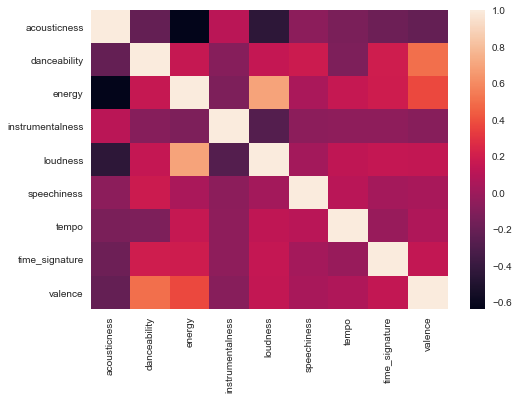

In [347]:
sns.heatmap(X_std.corr())

In [157]:
X.head()

acousticness  danceability  energy  instrumentalness  loudness  \
0       0.25600         0.787   0.673          0.000004    -4.577   
1       0.02520         0.843   0.741          0.000000    -5.609   
2       0.00146         0.514   0.730          0.000095    -5.934   
3       0.32100         0.834   0.454          0.000006    -9.750   
4       0.10400         0.896   0.586          0.000000    -6.687   

   speechiness    tempo  time_signature  valence  
0       0.1580  110.962             4.0    0.786  
1       0.3340  168.983             4.0    0.680  
2       0.0598  171.005             4.0    0.334  
3       0.2010   81.618             4.0    0.837  
4       0.0559  116.971             4.0    0.642

### Standardizing data

As here the analysis will be over the distance between each track's features, it is necessary to standardize all features to the same scale

In [68]:
from sklearn.preprocessing import StandardScaler

In [370]:
scaler = StandardScaler()
scaler.fit(X)
X_std = pd.DataFrame(scaler.transform(X), columns=X.columns)
X_std.head()

acousticness  danceability  instrumentalness  loudness  speechiness  \
0      0.038168      1.126333         -0.252051  0.835346     1.075794   
1     -0.823374      1.479856         -0.252073  0.547625     3.222871   
2     -0.911992     -0.597093         -0.251477  0.457015    -0.122177   
3      0.280803      1.423040         -0.252035 -0.606883     1.600364   
4     -0.529226      1.814440         -0.252073  0.247079    -0.169754   

      tempo  time_signature  
0 -0.308215        0.205001  
1  1.692968        0.205001  
2  1.762708        0.205001  
3 -1.320310        0.205001  
4 -0.100961        0.205001

In [350]:
#Sampling

In [371]:
X_std_sample = X_std.sample(500, random_state = 42)
X_std_sample.head()

acousticness  danceability  instrumentalness  loudness  speechiness  \
52       -0.058886      0.507667         -0.252073  0.573274    -0.302727   
680       0.508507      0.589735         -0.252036 -1.628682    -0.473517   
1376     -0.766635     -0.571841         -0.252049  0.211672    -0.380802   
1237     -0.346316      1.404101         -0.238763  1.447031    -0.142916   
203       2.218154     -0.199379         -0.252073  0.444190    -0.510115   

         tempo  time_signature  
52    0.350798        0.205001  
680  -0.285624        0.205001  
1376 -0.842614        0.205001  
1237 -0.410308        0.205001  
203  -1.064182        0.205001

### Finding the number of clusters

**Dendrogram**

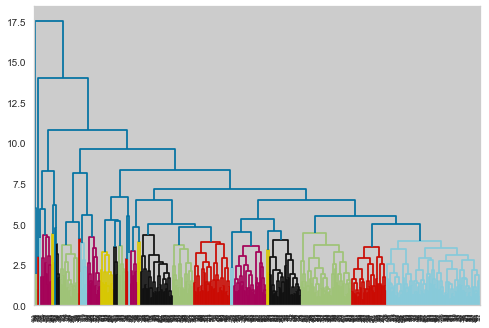

In [247]:
dendrogram = sch.dendrogram(sch.linkage(X_std_sample, method='single'),
                            color_threshold=4.5)

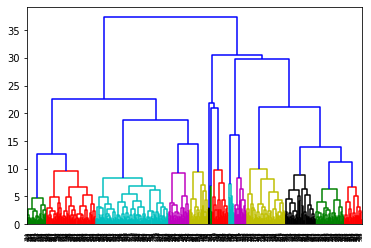

In [164]:
dendrogram = sch.dendrogram(sch.linkage(X_std_sample, method='ward'), color_threshold=11)

### AGG Clustering
- In this step, some tests will be made to find a good way to cluster the songs without knowing the track's genre

In [160]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [353]:
model = AgglomerativeClustering(n_clusters=14, linkage='ward')
model.fit(X_std)
labels = model.labels_
labels

array([ 6,  3, 12, ..., 11,  1,  3])

In [357]:
model = AgglomerativeClustering(n_clusters=24, linkage='complete')
model.fit(X_std)
labels = model.labels_
labels

array([ 2,  5, 20, ...,  1, 22, 10])

### Finding the number of clusters

**PCA to visualize**

cumsum of explained variance ratio: [0.25850753 0.41799422]


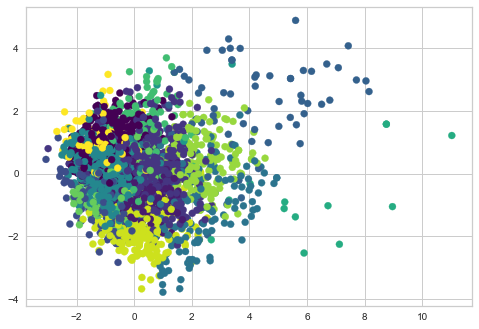

In [354]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_std)
pca.transform(X_std)
print('cumsum of explained variance ratio:', pca.explained_variance_ratio_.cumsum())

plt.scatter(pca.transform(X_std)[:,0], 
            pca.transform(X_std)[:,1], 
            c = labels, cmap = 'viridis');

In [355]:
pd.DataFrame(zip(pca.transform(X_std)[:,0], pca.transform(X_std)[:,1], bb_songs.track, bb_songs.artist, bb_songs.art_genres), 
             columns=['pc1','pc2','track', 'artist', 'art_genres']).sort_values(by='pc1')

pc1       pc2                                              track  \
2178  -3.061212  0.450919                                      Make No Sense   
2267  -2.987545  0.795357                                           Amarillo   
2180  -2.683792  1.340721                                              1 2 3   
79    -2.637962  1.139663                                               Jump   
36    -2.586784 -0.089181                                             Landed   
2200  -2.559127  0.146988                                          Go Stupid   
2278  -2.533666  0.066818                                 Esta Cabron Ser Yo   
151   -2.508762  0.592613                                               PTSD   
41    -2.476663  0.747489                                       Whats Poppin   
3064  -2.437674  0.845503                                           Any Song   
2177  -2.429666 -0.292533                                              VIBEZ   
1624  -2.425063  1.401633                                         In Da Club   
2888  -2.415541  1.964366                                               Suge   
454   -2.397772  0.711018                                        Billie Jean   
2408  -2.385086  0.053938                                          Perriando   
78    -2.382074  0.064984                                           Godzilla   
2184  -2.377970  0.565788                                           Headlocc   
1     -2.375741 -0.180780                                             Savage   
109   -2.364980  1.023339                                      Greatest Hits   
2385  -2.353041 -0.238650                                          Honey Boo   
2245  -2.349595 -0.778534                                      Sigues Con El   
1182  -2.324818  0.963840                               Gettin' Jiggy Wit It   
97    -2.294068  1.462909                                   BLAME IT ON BABY   
1671  -2.287623 -0.052052                                    Dr. Dre -- 2001   
2201  -2.272860  0.523210                                                BOP   
245   -2.263951  1.447528                                     All Eyez On Me   
464   -2.258244  1.434775                                      Family Affair   
1733  -2.257439  0.309397                                     Safe And Sound   
441   -2.247807  0.320930                                All About That Bass   
528   -2.231160 -1.605144                               Empire State Of Mind   
1953  -2.223824  0.499444                                             Sucker   
2511  -2.220317  0.600738                               Boy, You Can Keep It   
2616  -2.211173 -0.297327                                    Quarantine Life   
3171  -2.206369  0.983498                                     No Se Me Quita   
103   -2.194557  0.753333                                   Future Nostalgia   
3151  -2.192340  0.667619                                     Dame Tu Cosita   
1200  -2.188367  1.088886                                          Hypnotize   
1039  -2.185602  0.435619                                       Ice Ice Baby   
2363  -2.177987  0.779537                                            Tu y Yo   
2174  -2.177973 -0.353667                                       Captain Hook   
1581  -2.176350  0.324142                                  Cuando Me Enamoro   
1095  -2.172755  0.923662                               Mo Money Mo Problems   
2392  -2.169501  0.219130                                              # 1's   
514   -2.161674  1.165746                                     Hollaback Girl   
1602  -2.159102  1.416625                                             Rakata   
3134  -2.155340  0.130826                                                Icy   
2383  -2.130214  0.946019                                          Cartagena   
350   -2.125745  0.671810                                      M!ssundaztood   
2271  -2.118733 -0.768772                                            La Cama   
586   -2.112

In [ ]:
# using 24 clusters and 'complete' linkage

cumsum of explained variance ratio: [0.25850753 0.41799422]


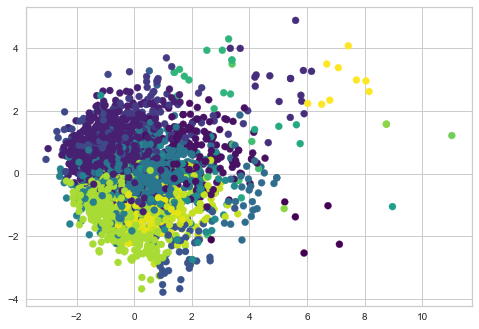

In [358]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_std)
pca.transform(X_std)
print('cumsum of explained variance ratio:', pca.explained_variance_ratio_.cumsum())

plt.scatter(pca.transform(X_std)[:,0], 
            pca.transform(X_std)[:,1], 
            c = labels, cmap = 'viridis');

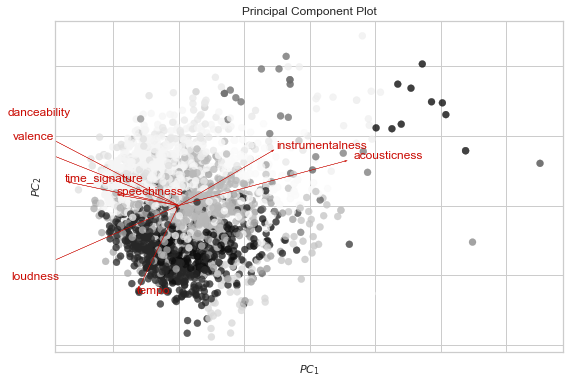

In [359]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True, proj_features=True, colors=list(labels), cmap='PuRd')
visualizer.fit_transform(X_std)

visualizer.show();

**Comparing to real genres**

In [360]:
sample_lbl = bb_songs.copy()
sample_lbl['label'] = labels

In [361]:
sample_lbl[['track', 'artist', 'art_genres', 'chart', 'label']].sort_values(by='label').tail(50)

track                 artist  \
2491                      All Night Long            Jonas Blue    
488           Total Eclipse Of The Heart           Bonnie Tyler   
2431                          Right Time          Hayden James    
463                 Nothing Compares 2 U        Sinead O'Connor   
1823                            Comedown                   Bush   
617                      Harden My Heart           Quarterflash   
3001                   How Do You Sleep?              Sam Smith   
218                        Back To Black          Amy Winehouse   
2948                          Like A Man           Dallas Smith   
746                Pour Some Sugar On Me            Def Leppard   
2946                      Slow Down Town      James Barker Band   
2945              When You Know You Know                   Tim    
1761  Santa Monica (Watch The World Die)              Everclear   
2942                                Mine           Felix Cartal   
2601              Goodness Of God (Live)          Bethel Music    
2448                     Different World            Alan Walker   
3218                            16 Marzo          Achille Lauro   
1740                          By The Way  Red Hot Chili Peppers   
1738                                Numb            Linkin Park   
2619                   The God Who Stays           Matthew West   
3224          In Your Eyes (Feat. Alida)           Robin Schulz   
2621                      Keep The Faith       Charles Jenkins    
2002                            This Bar          Morgan Wallen   
2950              Things I Shouldn't Say         Meghan Patrick   
2592                       Reckless Love            Cory Asbury   
2040                             My Wish          Rascal Flatts   
643                      Here I Go Again             Whitesnake   
3184             Time Flies... 1994-2009                  Oasis   
1814         Welcome To The Black Parade    My Chemical Romance   
2556                           Way Maker                Mandisa   
1804                       Shake Me Down      Cage The Elephant   
1800                      Everything Zen                   Bush   
1795                           Glycerine                   Bush   
2966                 Under The Graveyard          Ozzy Osbourne   
1767                         I Will Wait               Mumford    
2581                              Wonder        Hillsong UNITED   
2039                       God's Country          Blake Shelton   
2584   RUN WILD. LIVE FREE. LOVE STRONG.              for KING    
228                         City Burials              Katatonia   
227                           Never Will         Ashley McBryde   
1860                        Megalomaniac                Incubus   
3209                             Eftihia           Minos Matsas   
3255               East Of The Full Moon                 Deuter   
2802              Christmas Time Is Here    Vince Guaraldi Trio   
2695                 My Brilliant Friend            Max Richter   
3254        Koyasan: Reiki Sound Healing                 Deuter   
3305                                Stay            Chad Lawson   
317                         The Graduate             Soundtrack   
311                                 Asia                   Asia   
2683                               Sleep            Max Richter   

                                             art_genres  \
2491                                                 []   
488   ['europop', 'mellow gold', 'new wave pop', 'so...   
2431                                                 []   
463      ['folk', 'lilith', 'new wave pop', 'pop rock']   
1823  ['alternative metal', 'alternative rock', 'gru...   
617         ['album rock', 'new wave pop', 'soft rock']   
3001                 ['pop', 'post-teen pop', 'uk pop']   
218                        ['british soul', 'neo soul']   
2948  ['canadian contemporary country', 'canadian co...   
746       ['album rock', 'h

### KMEANS

### Finding the number of clusters

**K-Elbow**

In [249]:
from sklearn.cluster import KMeans

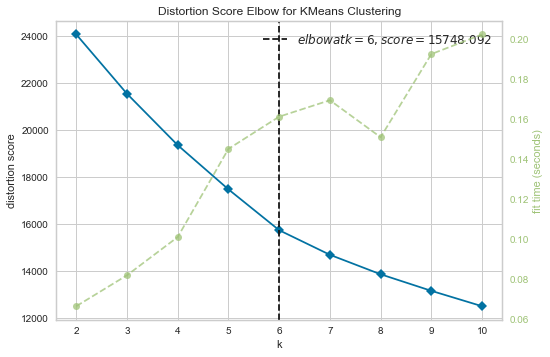

In [262]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model)

visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

**Silhouette**

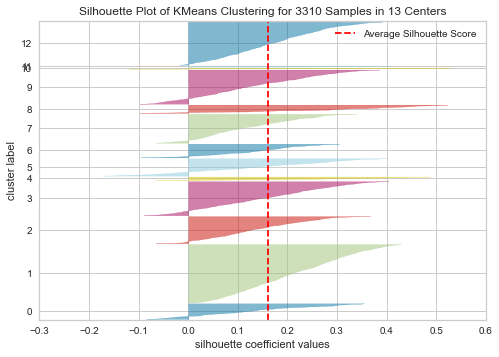

In [279]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(13).fit(X_std)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_std)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [382]:
kmeans = KMeans(24, n_jobs=-1)
kmeans.fit(X_std)
kmeans.predict(X_std)
labels = list(kmeans.labels_)

cumsum of explained variance ratio: [0.26220461 0.43004223]


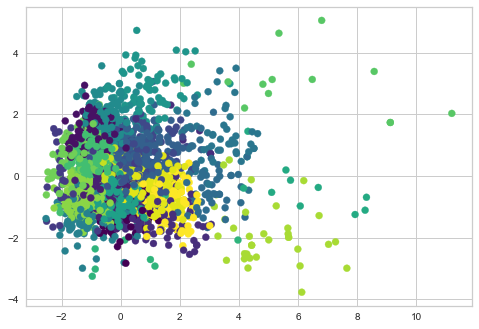

In [383]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(X_std)
pca.transform(X_std)
print('cumsum of explained variance ratio:', pca.explained_variance_ratio_.cumsum())

plt.scatter(pca.transform(X_std)[:,0], 
            pca.transform(X_std)[:,1], 
            c = labels, cmap = 'viridis');

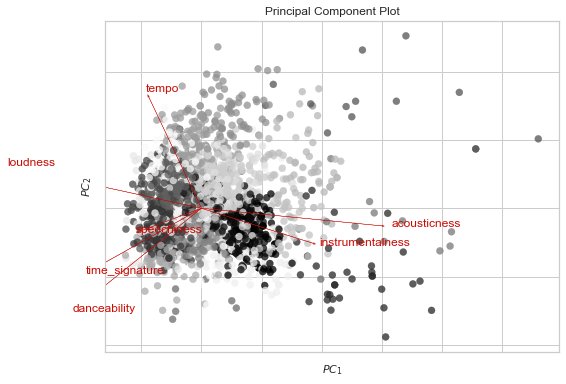

In [384]:
from yellowbrick.features import PCA
visualizer = PCA(scale=True, proj_features=True, colors=list(labels))
visualizer.fit_transform(X_std)

visualizer.show();

In [ ]:
## COMPARING TO THE REAL DATA

In [385]:
sample_lbl = bb_songs.copy()
sample_lbl['label'] = labels

In [386]:
sample_lbl[['track', 'artist', 'art_genres', 'chart', 'label']].sort_values(by='label')

track  \
350                                 One Of These Nights   
2466                                          Connected   
1107                                    Where Do You Go   
2469                                           Only You   
572                                            Maneater   
2705                            The Ultimate Collection   
1106                          Touch Me (All Night Long)   
1284                                     All Or Nothing   
804                        She Works Hard For The Money   
1103                                 Rhythm Is A Dancer   
1296                                     Live And Learn   
737                                  Ride Like The Wind   
1936                                               High   
1299                        This One's For The Children   
1020                                    I Adore Mi Amor   
1306                                            Freedom   
560                                          Spellbound   
559                                              Guilty   
1816                                       Movin' On Up   
745                                             Hold Me   
277                                Saturday Night Fever   
1085                                     Hold You Tight   
1334                                      All This Time   
545                                    LUCK OF THE DRAW   
1275                                       Free Fallin'   
1332                                  Life Is A Highway   
789                                     Raspberry Beret   
793                                    Together Forever   
794                                      Jacob's Ladder   
1308                                     Real Real Real   
795                                     Who's That Girl   
1028                                       Black Velvet   
1859                                       Give It Away   
1809                                        Dirty Blvd.   
584                     I Can't Go For That (No Can Do)   
587                                           On My Own   
1129                                Sending All My Love   
718                                     Say It Isn't So   
2106                                           Dissolve   
721                       Do You Really Want To Hurt Me   
967                                   Funky Cold Medina   
970                               Turn Your Love Around   
822                                      U Got The Look   
971                                        The Wanderer   
2097                                             Dreams   
2096                                 Sweet Home Alabama   
722                                        Back To Life   
974                                     Change Of Heart   
2776                                     Last Christmas   
1251                                         Mr. Wendal   
818                                Make Me Lose Control   
607                                        Ghostbusters   
1120                                        Tom's Diner   
1266                 Get Up! (Before The Night Is Over)   
589                                       Rock With You   
732                                      Sexual Healing   
1112                                          Hey Lover   
595                                        Roll With It   
811                                      Buffalo Stance   
1268                                         Feels Good   
596                   Everybody Wants To Rule The World   
1117                                   Praying For Time   
602                     I Just Called To Say I Love You   
172                           The Definitive Collection   
1256       I Belong To You (Every Time I See Your Face)   
2088                                   Time (You And I)   
1255                            What About Your Friends   
2052               The Best That I Cou

# Distance Between songs

In [446]:
from scipy.spatial.distance import pdist, squareform
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [448]:
word_tkn = bb_songs.copy()

In [449]:
word_tkn.head()

track               artist  \
0           Say So             Doja Cat   
1           Savage  Megan Thee Stallion   
2  Blinding Lights           The Weeknd   
3     Toosie Slide                Drake   
4          The Box          Roddy Ricch   

                                          art_genres    chart  \
0                                ['la indie', 'pop']  hot-100   
1    ['houston rap', 'pop', 'pop rap', 'trap queen']  hot-100   
2  ['canadian contemporary r&b', 'canadian pop', ...  hot-100   
3  ['canadian hip hop', 'canadian pop', 'hip hop'...  hot-100   
4                                    ['melodic rap']  hot-100   

                             tracks_uri                           albums_uris  \
0  spotify:track:3Dv1eDb0MEgF93GpLXlucZ  spotify:album:1MmVkhiwTH0BkNOU3nw5d3   
1  spotify:track:55CHeLEfn5iJ0IIkgaa4si  spotify:album:6Lo6ylJg4qbFfxicPEOzMI   
2  spotify:track:0VjIjW4GlUZAMYd2vXMi3b  spotify:album:4yP0hdKOZPNshxUOjY0cZj   
3  spotify:track:127QTOFJsJQp5LbJbu3A1y  spotify:album:3xIwVbGJuAcovYIhzbLO3J   
4  spotify:track:0nbXyq5TXYPCO7pr3N8S4I  spotify:album:52u4anZbHd6UInnmHRFzba   

   popularity  acousticness  danceability  energy  instrumentalness   key  \
0          96       0.25600         0.787   0.673          0.000004  11.0   
1          92       0.02520         0.843   0.741          0.000000  11.0   
2         100       0.00146         0.514   0.730          0.000095   1.0   
3          97       0.32100         0.834   0.454          0.000006   1.0   
4          97       0.10400         0.896   0.586          0.000000  10.0   

   liveness  loudness  mode  speechiness    tempo  time_signature  valence  
0    0.0904    -4.577   0.0       0.1580  110.962             4.0    0.786  
1    0.0960    -5.609   1.0       0.3340  168.983             4.0    0.680  
2    0.0897    -5.934   1.0       0.0598  171.005             4.0    0.334  
3    0.1140    -9.750   0.0       0.2010   81.618             4.0    0.837  
4    0.7900    -6.687   0.0       0.0559  116.971             4.0    0.642

In [450]:
count_vectorizer = CountVectorizer(ngram_range=(2,2), max_df=1000, min_df=5)
tfidf_transformer = TfidfTransformer()

transformed_vector = count_vectorizer.fit_transform(word_tkn.art_genres)
transformed_vector

<3310x556 sparse matrix of type '<class 'numpy.int64'>'
	with 18243 stored elements in Compressed Sparse Row format>

In [461]:
count_vectorizer.vocabulary_

{'la indie': 228,
 'indie pop': 209,
 'rap pop': 380,
 'pop pop': 337,
 'pop rap': 346,
 'rap trap': 388,
 'trap queen': 532,
 'canadian contemporary': 47,
 'contemporary canadian': 76,
 'canadian pop': 53,
 'canadian hip': 49,
 'hip hop': 180,
 'hop canadian': 184,
 'pop hip': 323,
 'hop pop': 194,
 'rap rap': 384,
 'rap toronto': 387,
 'toronto rap': 527,
 'melodic rap': 246,
 'rap melodic': 378,
 'nc hip': 283,
 'hop rap': 195,
 'pop post': 338,
 'post teen': 360,
 'teen pop': 525,
 'atl hip': 19,
 'rap southern': 386,
 'southern hip': 495,
 'hop trap': 197,
 'contemporary country': 77,
 'country pop': 84,
 'pop texas': 352,
 'texas country': 526,
 'dance pop': 91,
 'electropop pop': 115,
 'pop uk': 354,
 'uk pop': 535,
 'country country': 81,
 'country road': 85,
 'road deep': 401,
 'deep talent': 97,
 'talent show': 523,
 'pop rock': 348,
 'soul pop': 486,
 'road modern': 402,
 'modern country': 269,
 'country rock': 86,
 'chicago rap': 61,
 'underground hip': 537,
 'hop hip': 190

In [462]:
count_vectorizer.get_feature_names()

['acoustic pop',
 'adult standards',
 'alabama indie',
 'alberta country',
 'album rock',
 'alternative country',
 'alternative hip',
 'alternative metal',
 'alternative pop',
 'alternative rock',
 'and blues',
 'and holler',
 'and roll',
 'anime rock',
 'anthem worship',
 'arena pop',
 'arkansas country',
 'art pop',
 'art rock',
 'atl hip',
 'atl trap',
 'australian dance',
 'australian pop',
 'australian rock',
 'bachata latin',
 'bakersfield sound',
 'band dance',
 'band new',
 'banda cumbia',
 'banda grupera',
 'banda norteno',
 'beatlesque british',
 'beatlesque classic',
 'big room',
 'blues rock',
 'blues swing',
 'bossa nova',
 'bow pop',
 'boy band',
 'boy group',
 'brill building',
 'british invasion',
 'british soul',
 'britpop madchester',
 'bubblegum dance',
 'bubblegum pop',
 'building pop',
 'canadian contemporary',
 'canadian country',
 'canadian hip',
 'canadian indie',
 'canadian latin',
 'canadian metal',
 'canadian pop',
 'canadian rock',
 'canadian singer',
 'canc

# Supervised - Song

In [431]:
import concurrent.futures
import urllib.request
from bs4 import BeautifulSoup

url = 'http://everynoise.com'


# Retrieve a single page and report the url and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url) as response:
        return response.read()

everynoise_genres = []
# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:

    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(load_url, url, 60): url}
    for future in concurrent.futures.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
            bs = BeautifulSoup(data)
            for i in range(len(bs.find_all('div', attrs={'class' : 'genre scanme'}))):
                everynoise_genres.append(bs.find_all('div', attrs={'class' : 'genre scanme'})[i].get_text().replace('»','').strip())
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
            pass
        else:
            pass

In [433]:
len(everynoise_genres)

4350

In [444]:
en_genres = pd.DataFrame(everynoise_genres, columns=['genres'])
en_genres.head()

genres
0           latin shoegaze
1    norwegian psychedelic
2  progressive power metal
3    indonesian indie rock
4             operatic pop

In [441]:
en_genres.to_csv('data/analysis/everynoise_genres.csv')

## NLP - Natural Language Understanding

In [134]:
# Based on LYRICS

https://cloud.ibm.com/apidocs/natural-language-understanding?_ga=2.39112618.828719762.1589919045-2113240458.1589919045&cm_mc_uid=37381749047515894799679&cm_mc_sid_50200000=74196191589919045337&cm_mc_sid_52640000=29695401589919045340#authentication

# Deploy

Examples:
- https://semiconductor.withgoogle.com

typeform.com

## Speech Recognition

In [2]:
import speech_recognition as sr

In [6]:
r = sr.Recognizer()

In [15]:
with sr.Microphone() as source:
    # read the audio data from the default microphone
    print("Recognizing...")
    audio_data = r.record(source, duration=5)
    # convert speech to text
    text = r.recognize_google(audio_data, language="pt-PT")
    print(text)

Recognizing...
alô olá tudo bem como vocês


## for webscrapping

In [ ]:
import concurrent.futures
import urllib.request

URLS = ['https://www.soccerbase.com/referees/home.sd?comp_id=20',
        'https://www.foxsports.com/soccer/standings?competition=4']


    # Retrieve a single page and report the url and contents
def load_url(url, timeout):
    with urllib.request.urlopen(url) as response:
        return response.read()

dados = []
# We can use a with statement to ensure threads are cleaned up promptly
with concurrent.futures.ThreadPoolExecutor(max_workers=20) as executor:
    # Start the load operations and mark each future with its URL
    future_to_url = {executor.submit(load_url, url, 60): url for url in URLS}
    for future in concurrent.futures.as_completed(future_to_url):
        url = future_to_url[future]
        try:
            data = future.result()
#            dados.append(get_product_data(url, data))
        except Exception as exc:
            print('%r generated an exception: %s' % (url, exc))
            pass
        else:
            pass
        
from bs4 import BeautifulSoup
bs = BeautifulSoup(data)
bs

# Sources and References

## Databases & APIs

> `Spotify`: 
- Official Documentation: https://developer.spotify.com/documentation/web-api/reference/
- spotipy: Python module for Spotify's API (https://pypi.org/project/spotipy/)

> `Billboard`
- billboard.py: Python module for Billboard's API (https://pypi.org/project/billboard.py/) 
- github: (https://github.com/guoguo12/billboard-charts)

## The algorithm

https://musicbrainz.org/doc/MusicBrainz_Database

https://hackernoon.com/spotifys-discover-weekly-how-machine-learning-finds-your-new-music-19a41ab76efe

- Building Music Playlists Recommendation System
https://towardsdatascience.com/building-music-playlists-recommendation-system-564a3e63ef64

https://natural-language-understanding-demo.ng.bluemix.net

## Deploy

How To Convert Speech to Text in Python

https://hackernoon.com/how-to-convert-speech-to-text-in-python-844e3y4l

- Every noise at once: http://everynoise.com/#otherthings


https://blog.chartmetric.com/genre-specific-music-recommendations/

## Requirements

In [ ]:
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            name = val.__name__.split(".")[0]
        elif isinstance(val, type):
            name = val.__module__.split(".")[0]
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]
        yield name
        
imports = list(set(get_imports()))
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))
for r in requirements:
    print("{}=={}".format(*r))